Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.3  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **4. studenog 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [3]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [4]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [5]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

1.0


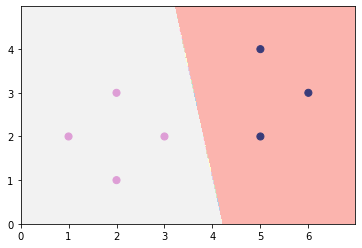

In [6]:
# Vaš kôd ovdje
clas = RidgeClassifier(alpha=0)
clas.fit(seven_X,seven_y)
print(accuracy_score(seven_y,clas.predict(seven_X)))
mlutils.plot_2d_clf_problem(seven_X,seven_y,h=clas.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

1.0


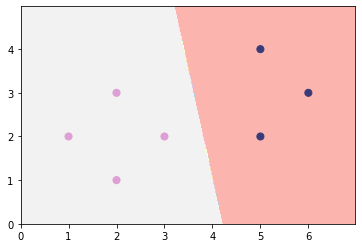

In [5]:
# Vaš kôd ovdje
lin = LinearRegression()
lin.fit(seven_X,seven_y)
print(accuracy_score(seven_y,lin.predict(seven_X)>=0.5))
mlutils.plot_2d_clf_problem(seven_X,seven_y,h=lambda x: lin.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

0.875


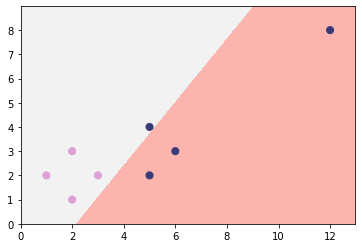

In [7]:
# Vaš kôd ovdje
clas = RidgeClassifier(alpha=0)
clas.fit(outlier_X,outlier_y)
print(accuracy_score(outlier_y,clas.predict(outlier_X)))
mlutils.plot_2d_clf_problem(outlier_X,outlier_y,h=clas.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

0.875


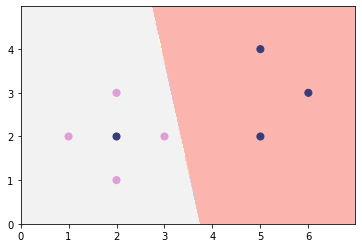

In [9]:
# Vaš kôd ovdje
clas = RidgeClassifier(alpha=0)
clas.fit(unsep_X,unsep_y)
print(accuracy_score(unsep_y,clas.predict(unsep_X)))
mlutils.plot_2d_clf_problem(unsep_X,unsep_y,h=clas.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [10]:
from sklearn.datasets import make_classification

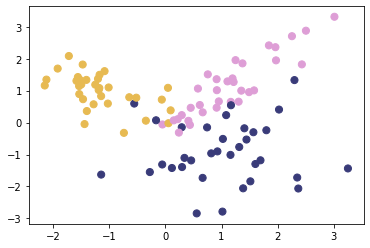

In [11]:
# Vaš kôd ovdje
X,y = make_classification(n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=3)
mlutils.plot_2d_clf_problem(X,y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

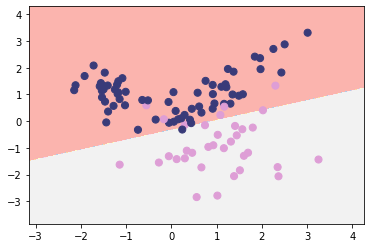

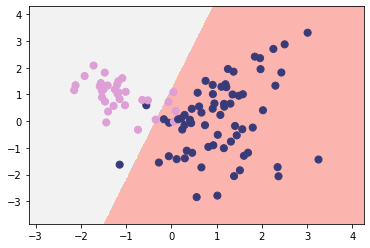

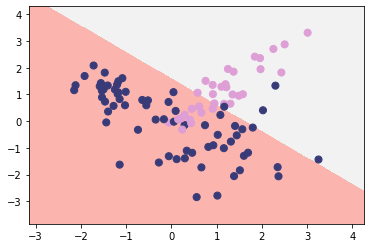

0.86


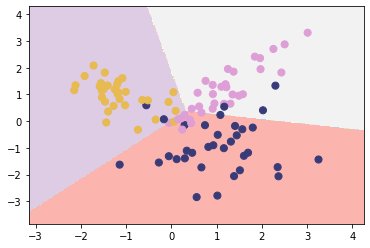

0.86


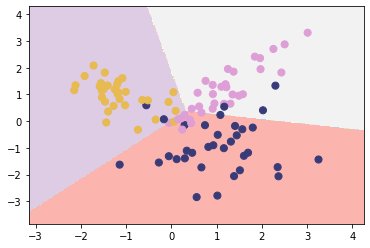

In [12]:
# Vaš kôd ovdje
y1 = np.copy(y)
y1[y1==0] = 4
y1[y1==1] = 0
y1[y1==2] = 0
y1[y1==4] = 1
h1 = LinearRegression()
h1.fit(X,y1)
mlutils.plot_2d_clf_problem(X,y1,h=lambda x: h1.predict(x) >= 0.5)
plt.show()

y2 = np.copy(y)
y2[y2==1] = 4
y2[y2==0] = 0
y2[y2==2] = 0
y2[y2==4] = 1
h2 = LinearRegression()
h2.fit(X,y2)
mlutils.plot_2d_clf_problem(X,y2,h=lambda x: h2.predict(x) >= 0.5)
plt.show()

y3 = np.copy(y)
y3[y3==2] = 4
y3[y3==0] = 0
y3[y3==1] = 0
y3[y3==4] = 1
h3 = LinearRegression()
h3.fit(X,y3)
mlutils.plot_2d_clf_problem(X,y3,h=lambda x: h3.predict(x) >= 0.5)
plt.show()

def predict(X):
    p1 = h1.predict(X)
    p2 = h2.predict(X)
    p3 = h3.predict(X)
    
    for i in range(0,len(p1)):
        if (p1[i]>p2[i]):
            if (p1[i]>p3[i]):
                p1[i]=0
            else:
                p1[i]=2
        else:
            if (p2[i]>p3[i]):
                p1[i] = 1
            else:
                p1[i] = 2
    
    return p1

print(accuracy_score(y,predict(X)))
mlutils.plot_2d_clf_problem(X,y,h=predict)
plt.show()

clas = RidgeClassifier(alpha=0)
clas.fit(X,y)
print(accuracy_score(y,clas.predict(X)))
mlutils.plot_2d_clf_problem(X,y,h=clas.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

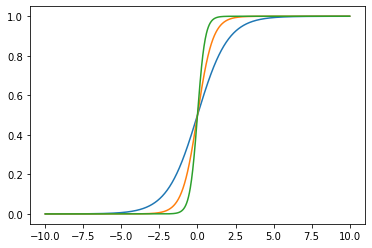

In [26]:
# Vaš kôd ovdje

def sigm(x,a=1):
    return 1/(1+exp(-a*x))

xs = np.linspace(-10,10,1000)

plt.plot(xs,sigm(xs))
plt.plot(xs,sigm(xs,a=2))
plt.plot(xs,sigm(xs,a=4))
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [14]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x, w): 
    # Vaš kôd ovdje
    return sigm(np.dot(w,x))

def cross_entropy_error(X, y, w): 
    # Vaš kôd ovdje
    result = 0
    for j in range(0,X.shape[0]):
            h = lr_h(X[j],w)
            result = result - y[j]*math.log(h) - (1-y[j])*math.log(1-h)
    return result/X.shape[0]

def lr_train(X, y, eta=0.01, max_iter=2000, trace=False, alpha=0, epsilon=0.000001):
    # Vaš kôd ovdje
    
    poly = PolynomialFeatures(1)
    phi = poly.fit_transform(X)
    
    w0 = np.zeros([1,1])
    weights = np.zeros([1,X.shape[1]])
    
    prevIterCross = cross_entropy_error(phi,y,np.hstack([w0[0],weights[0]]))
    
    for i in range(0,max_iter):
        dw0 = np.zeros([1,1])
        dweights = np.zeros([1,X.shape[1]])
        for j in range(0,X.shape[0]):
            h = lr_h(phi[j],np.hstack([w0[i],weights[i]]))
            dw0 = dw0 - (h - y[j])
            dweights = dweights - (h-y[j])*X[j]
        w0n = w0[i]+eta*dw0
        wn = weights[i]*(1-eta*alpha)+eta*dweights
        w0 = np.vstack([w0,w0n])
        weights = np.vstack([weights,wn])
        iterCross = cross_entropy_error(phi,y,np.hstack([w0n,wn]))
        if (abs(prevIterCross-iterCross)<epsilon):
            print(i)
            break
        else:
            prevIterCross = iterCross
    if (trace):
        return np.hstack([w0,weights])
    else:
        return np.hstack([w0[w0.shape[0]-1],weights[w0.shape[0]-1]])


#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

[ 0.89926916 -0.5831554   0.37982919]
0.8571428571428571
0.4221092986706549


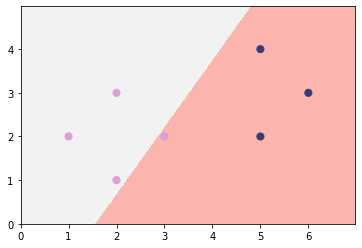

In [15]:
# Vaš kôd ovdje
weights = lr_train(seven_X,seven_y,alpha=1,epsilon=0.0001,max_iter=100)

w = np.tile(weights,(seven_X.shape[0],1))

poly = PolynomialFeatures(1)
phi = poly.fit_transform(seven_X)

print(weights)

print(accuracy_score(seven_y,sigm(np.sum(phi*w,axis=1))>=0.5))
print(cross_entropy_error(phi,seven_y,weights))
mlutils.plot_2d_clf_problem(seven_X,seven_y,h=lambda x: sigm(np.sum(poly.fit_transform(x)*weights,axis=1))>=0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

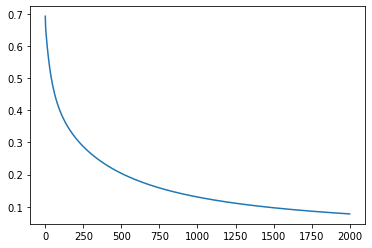

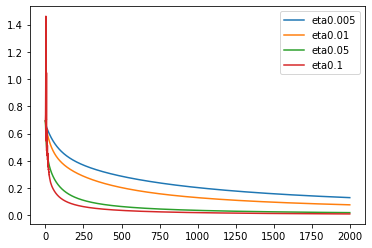

In [16]:
# Vaš kôd ovdje

weights = lr_train(seven_X,seven_y,alpha=0,max_iter=2000,trace=True)
poly = PolynomialFeatures(1)
phi = poly.fit_transform(seven_X)
entropy = []
for w in weights:
    entropy.append(cross_entropy_error(phi,seven_y,w))
plt.plot(entropy)
plt.show()

weights = lr_train(seven_X,seven_y,alpha=0,max_iter=2000,trace=True,eta=0.005)
entropy1 = []
for w in weights:
    entropy1.append(cross_entropy_error(phi,seven_y,w))
plt.plot(entropy1,label="eta"+str(0.005))

weights = lr_train(seven_X,seven_y,alpha=0,max_iter=2000,trace=True,eta=0.01)
entropy2 = []
for w in weights:
    entropy2.append(cross_entropy_error(phi,seven_y,w))
plt.plot(entropy2,label="eta"+str(0.01))

weights = lr_train(seven_X,seven_y,alpha=0,max_iter=2000,trace=True,eta=0.05)
entropy3 = []
for w in weights:
    entropy3.append(cross_entropy_error(phi,seven_y,w))
plt.plot(entropy3,label="eta"+str(0.05))

weights = lr_train(seven_X,seven_y,alpha=0,max_iter=2000,trace=True,eta=0.1)
entropy4 = []
for w in weights:
    entropy4.append(cross_entropy_error(phi,seven_y,w))
plt.plot(entropy4,label="eta"+str(0.1))

plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [17]:
from sklearn.linear_model import LogisticRegression

C:\Users\eztorjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ 0.79940576 -0.60801868  0.44288108]
0.8571428571428571


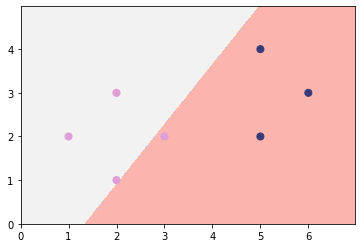

In [18]:
# Vaš kôd ovdje

log = LogisticRegression(C=1)
log.fit(seven_X,seven_y)
print(np.hstack([log.intercept_,log.coef_[0]]))
print(accuracy_score(seven_y,log.predict(seven_X)))
mlutils.plot_2d_clf_problem(seven_X,seven_y,h=log.predict)


### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

C:\Users\eztorjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ 0.85288719 -0.63040353  0.42506574]
0.875


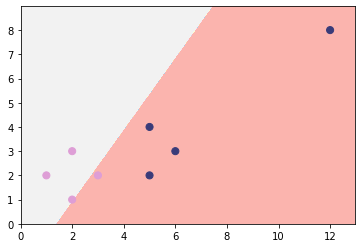

In [19]:
# Vaš kôd ovdje
log = LogisticRegression()
log.fit(outlier_X,outlier_y)
print(np.hstack([log.intercept_,log.coef_[0]]))
print(accuracy_score(outlier_y,log.predict(outlier_X)))
mlutils.plot_2d_clf_problem(outlier_X,outlier_y,h=log.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


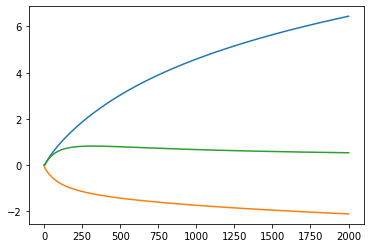

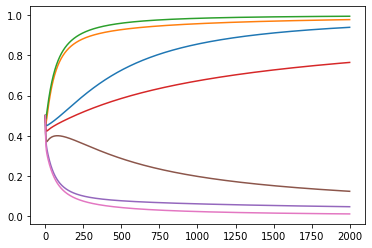

In [20]:
# Vaš kôd ovdje
weights = lr_train(seven_X,seven_y,alpha=0,max_iter=2000,trace=True)
poly = PolynomialFeatures(1)
phi = poly.fit_transform(seven_X)
out = []
for w in weights:
    out.append(sigm(np.sum(phi*w,axis=1)))
plt.plot(weights)
plt.show()
plt.plot(out)
plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

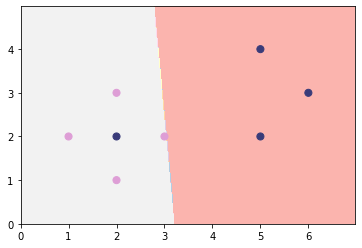

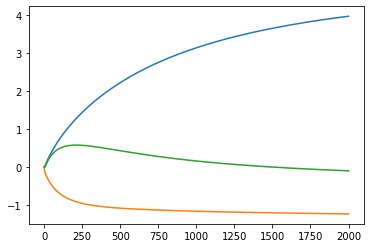

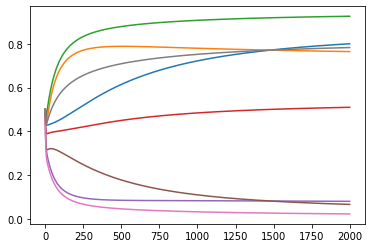

In [21]:
# Vaš kôd ovdje
weights = lr_train(unsep_X,unsep_y,alpha=0,max_iter=2000,trace=True)
poly = PolynomialFeatures(1)
phi = poly.fit_transform(unsep_X)
mlutils.plot_2d_clf_problem(unsep_X,unsep_y,h=lambda x: sigm(np.sum(poly.fit_transform(x)*weights[weights.shape[0]-1],axis=1))>=0.5)
plt.show()
out = []
for w in weights:
    out.append(sigm(np.sum(phi*w,axis=1)))
plt.plot(weights)
plt.show()
plt.plot(out)
plt.show()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [22]:
from numpy.linalg import norm

1300
422


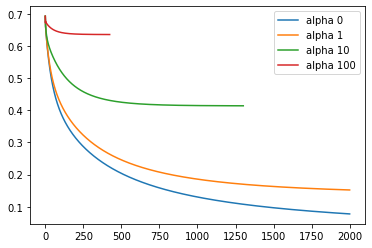

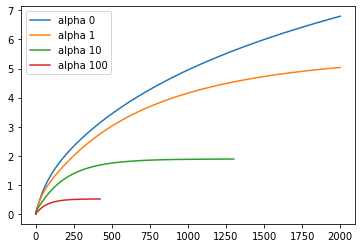

In [23]:
# Vaš kôd ovdje
weights = lr_train(seven_X,seven_y,alpha=0,max_iter=2000,trace=True)
poly = PolynomialFeatures(1)
phi = poly.fit_transform(seven_X)
entropy1 = []
l21 = []
for w in weights:
    entropy1.append(cross_entropy_error(phi,seven_y,w))
    l21.append(sqrt(np.dot(w,w.T)))

weights = lr_train(seven_X,seven_y,alpha=1,max_iter=2000,trace=True)
entropy2 = []
l22 = []
for w in weights:
    entropy2.append(cross_entropy_error(phi,seven_y,w))
    l22.append(sqrt(np.dot(w,w.T)))
    
weights = lr_train(seven_X,seven_y,alpha=10,max_iter=2000,trace=True)
entropy3 = []
l23 = []
for w in weights:
    entropy3.append(cross_entropy_error(phi,seven_y,w))
    l23.append(sqrt(np.dot(w,w.T)))
    
weights = lr_train(seven_X,seven_y,alpha=100,max_iter=2000,trace=True)
entropy4 = []
l24 = []
for w in weights:
    entropy4.append(cross_entropy_error(phi,seven_y,w))
    l24.append(sqrt(np.dot(w,w.T)))
    
plt.plot(entropy1,label="alpha 0")
plt.plot(entropy2, label="alpha 1")
plt.plot(entropy3, label="alpha 10")
plt.plot(entropy4, label="alpha 100")
plt.legend()
plt.show()

plt.plot(l21,label="alpha 0")
plt.plot(l22, label="alpha 1")
plt.plot(l23, label="alpha 10")
plt.plot(l24, label="alpha 100")
plt.legend()
plt.show()


### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [24]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

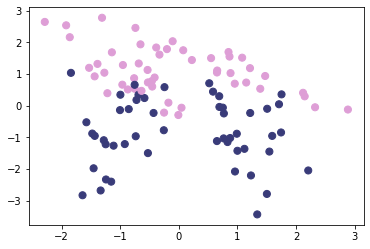

C:\Users\eztorjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.89


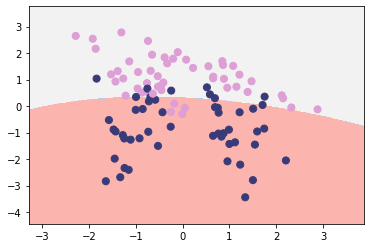

C:\Users\eztorjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9


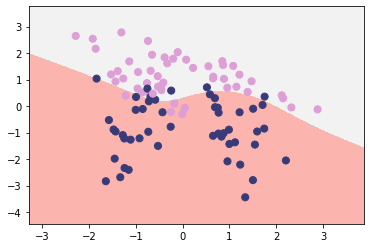

In [25]:
# Vaš kôd ovdje
X,y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                             n_clusters_per_class=2, n_classes=2)
mlutils.plot_2d_clf_problem(X,y)
plt.show()

log = LogisticRegression()
poly = PolynomialFeatures(2)
log.fit(poly.fit_transform(X),y)
print(accuracy_score(y,log.predict(poly.fit_transform(X))))
mlutils.plot_2d_clf_problem(X,y,h=lambda x : log.predict(poly.fit_transform(x)))
plt.show()

poly = PolynomialFeatures(3)
log.fit(poly.fit_transform(X),y)
print(accuracy_score(y,log.predict(poly.fit_transform(X))))
mlutils.plot_2d_clf_problem(X,y,h=lambda x : log.predict(poly.fit_transform(x)))
plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?